In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
!pip install seaborn

In [4]:
!ls

SVM1.ipynb  SVM_c1.py  SVM_codes  SVM.jpg  UniversalBank.csv


In [5]:
df = pd.read_csv(filepath_or_buffer = 'UniversalBank.csv')
df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   PersonalLoan  SecuritiesAccount  CDAccount  Online  CreditCard  
0             0                  1          0       0           0  
1             0                  1          0       0           0  
2             0                  0          0       0           0  
3             0                  0          0       0           0  
4             0                  0          0       0           1

In [6]:
print(f"There are {np.array(df.isnull().sum()).sum()} null values")

There are 0 null values


In [7]:
df.describe()

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  PersonalLoan  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean      2.396400     1.937938     1.881000    56.498800      0.096000   
std       1.147663     1.747659     0.839869   101.713802      0.294621   
min       1.000000     0.000000     1.000000     0.000000      0.000000   
25%       1.000000     0.700000     1.000000     0.000000      0.000000   
50%       2.000000     1.500000     2.000000     0.000000      0.000000   
75%       3.000000     2.500000     3.000000   101.000000      0.000000   
max       4.000000    10.000000     3.000000   635.000000      1.000000   

       SecuritiesAccount   CDAccount       Online   CreditCard  
count        5000.000000  5000.00000  5000.000000  5000.000000  
mean            0.104400     0.06040     0.596800     0.294000  
std             0.305809     0.23825     0.490589     0.455637  
min             0.000000     0.00000     0.000000     0.000000  
25%             0.000000     0.00000     0.000000     0.000000  
50%             0.000000     0.00000     1.000000     0.000000  
75%             0.000000     0.00000     1.000000     1.000000  
max             1.000000     1.00000     1.000000     1.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZIP Code           5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<Axes: title={'center': 'Heat map with correlation matrix between columns'}>

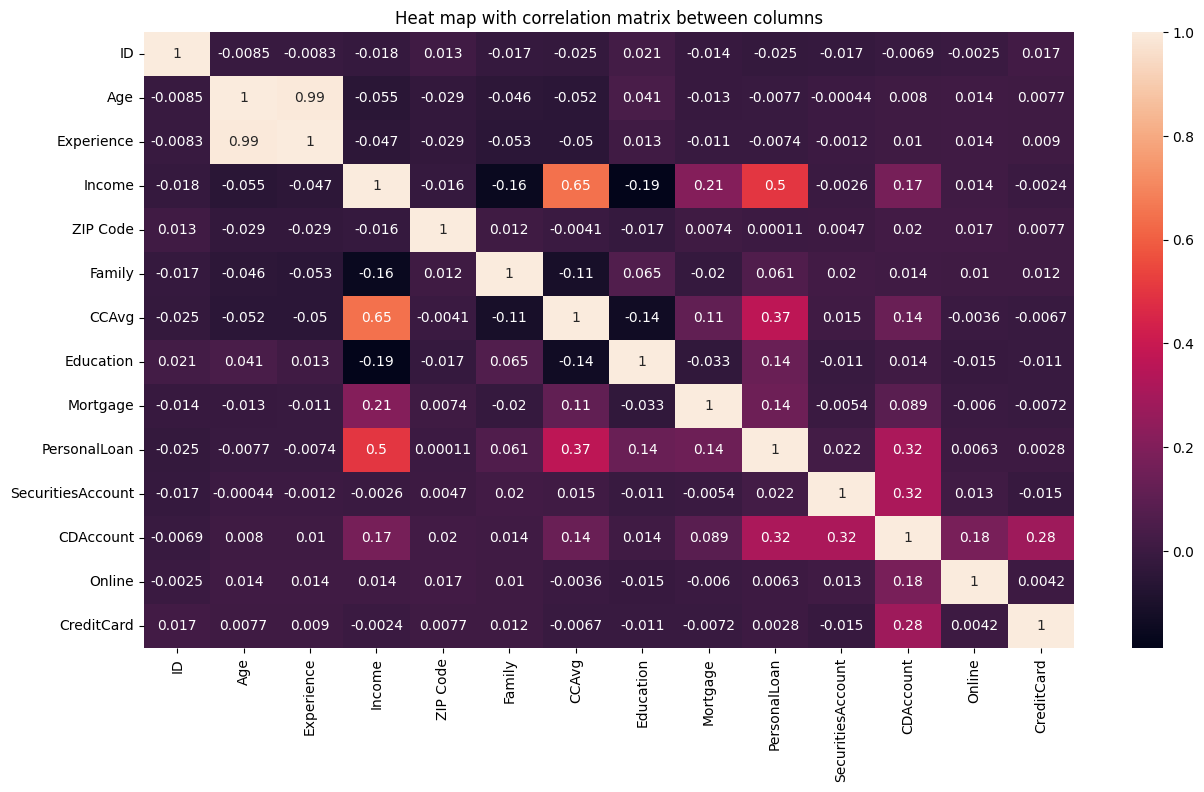

In [9]:
plt.figure(figsize = (15, 8))
plt.title('Heat map with correlation matrix between columns')
sns.heatmap(data = df.corr(), annot = True)

In [10]:
def find_colinearity(df):
    lst = []
    for i in range(df.corr().shape[0]):
        for j in range(i + 1,df.corr().shape[1]):
            if abs(df.corr().iloc[i, j]) > 0.8:
                lst.append((i, j))
    lst = np.array(lst)
    print(f"There are {lst.shape[0]} values that has a big collinearity")
    return lst
ret = find_colinearity(df)

There are 1 values that has a big collinearity


In [11]:
for i in range(ret.shape[0]):
    print(f"The column {df.columns[ret[i, 0]]} has a high collinearity with the column {df.columns[ret[i, 1]]}.")

The column Age has a high collinearity with the column Experience.


In [12]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

In [13]:
print(f"Dropping the columns of my dataset that will not influence in the final value.")

df = df.drop(["ID", "ZIP Code", "Age"], axis = 1)
df.head()

Dropping the columns of my dataset that will not influence in the final value.


Experience  Income  Family  CCAvg  Education  Mortgage  PersonalLoan  \
0           1      49       4    1.6          1         0             0   
1          19      34       3    1.5          1         0             0   
2          15      11       1    1.0          1         0             0   
3           9     100       1    2.7          2         0             0   
4           8      45       4    1.0          2         0             0   

   SecuritiesAccount  CDAccount  Online  CreditCard  
0                  1          0       0           0  
1                  1          0       0           0  
2                  0          0       0           0  
3                  0          0       0           0  
4                  0          0       0           1

In [14]:
print("Taking the values of classes and plotting it!")
class0 = df[df.CreditCard == 0]
class1 = df[df.CreditCard == 1]

print(f"The shape of both classes is {class0.shape} and {class1.shape}")

Taking the values of classes and plotting it!
The shape of both classes is (3530, 11) and (1470, 11)


In [15]:
type(class1)
#type(class0)

pandas.core.frame.DataFrame

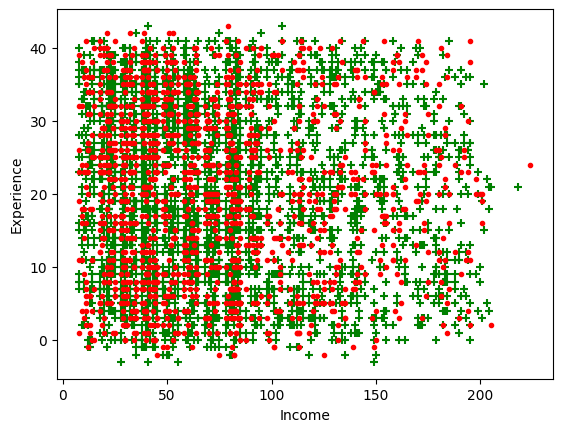

In [16]:
# Income vs Experience scatter plot
plt.xlabel('Income')
plt.ylabel('Experience')
plt.scatter(class0['Income'],class0['Experience'], color = 'green', marker='+')
plt.scatter(class1['Income'], class1['Experience'], color = 'red', marker='.')

In [17]:
from sklearn.preprocessing import StandardScaler

def scaling(df):
    scaler = StandardScaler()
    scaled = scaler.fit(df.drop('CreditCard', axis = 1)).transform(df.drop('CreditCard', axis = 1))
    print(f"The df type after scaling is : {type(scaled)}")
    return pd.DataFrame(scaled, columns = df.columns[: -1])
new_df = scaling(df)
new_df

The df type after scaling is : <class 'numpy.ndarray'>


Experience    Income    Family     CCAvg  Education  Mortgage  \
0      -1.666078 -0.538229  1.397414 -0.193385  -1.049078 -0.555524   
1      -0.096330 -0.864109  0.525991 -0.250611  -1.049078 -0.555524   
2      -0.445163 -1.363793 -1.216855 -0.536736  -1.049078 -0.555524   
3      -0.968413  0.569765 -1.216855  0.436091   0.141703 -0.555524   
4      -1.055621 -0.625130  1.397414 -0.536736   0.141703 -0.555524   
...          ...       ...       ...       ...        ...       ...   
4995   -1.491662 -0.733757 -1.216855 -0.021710   1.332484 -0.555524   
4996   -1.404454 -1.276892  1.397414 -0.880087  -1.049078  0.280238   
4997    1.647835 -1.081363 -0.345432 -0.937312   1.332484 -0.555524   
4998    1.735043 -0.538229  0.525991 -0.822862   0.141703 -0.555524   
4999   -1.404454  0.200434  0.525991 -0.651186  -1.049078 -0.555524   

      PersonalLoan  SecuritiesAccount  CDAccount    Online  
0        -0.325875           2.928915   -0.25354 -1.216618  
1        -0.325875           2.928915   -0.25354 -1.216618  
2        -0.325875          -0.341423   -0.25354 -1.216618  
3        -0.325875          -0.341423   -0.25354 -1.216618  
4        -0.325875          -0.341423   -0.25354 -1.216618  
...            ...                ...        ...       ...  
4995     -0.325875          -0.341423   -0.25354  0.821951  
4996     -0.325875          -0.341423   -0.25354  0.821951  
4997     -0.325875          -0.341423   -0.25354 -1.216618  
4998     -0.325875          -0.341423   -0.25354  0.821951  
4999     -0.325875          -0.341423   -0.25354  0.821951  

[5000 rows x 10 columns]

<Axes: title={'center': 'Heat map with correlation matrix between columns'}>

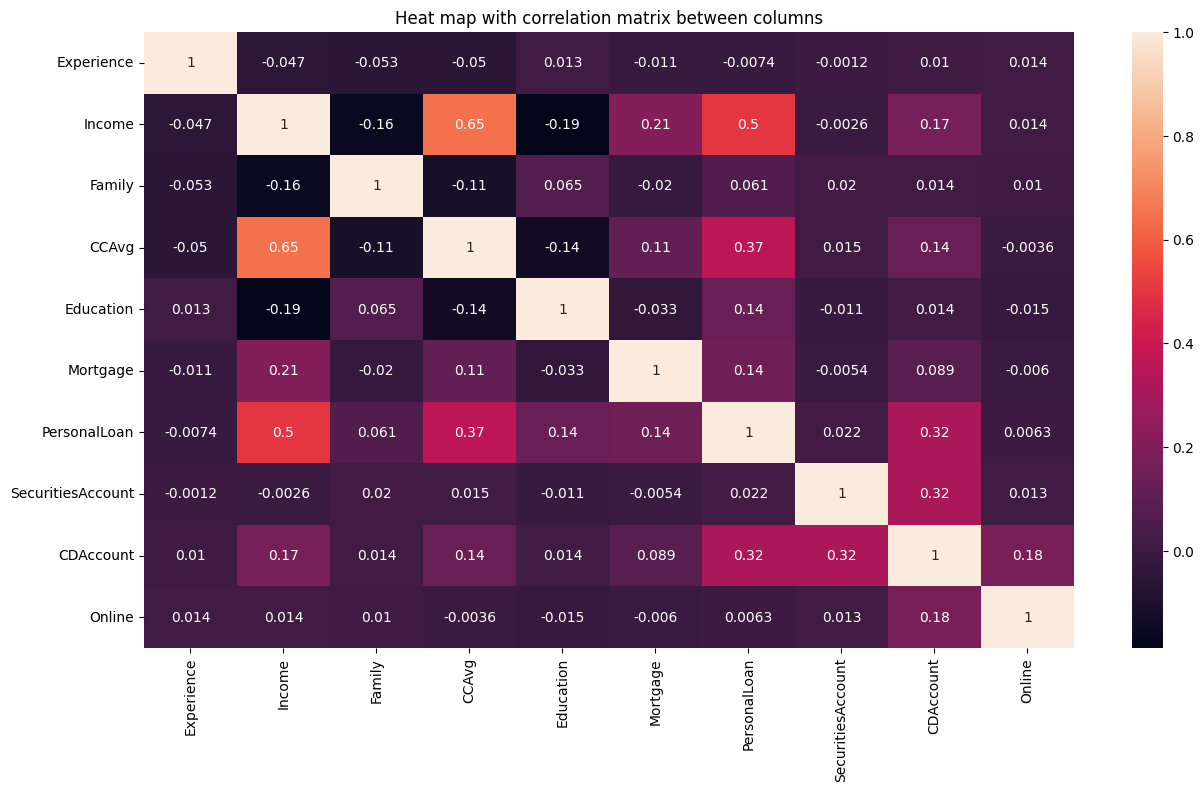

In [18]:
plt.figure(figsize = (15, 8))
plt.title('Heat map with correlation matrix between columns')
sns.heatmap(data = new_df.corr(), annot = True)

In [22]:
x = np.array(new_df)
y = np.array(df['CreditCard'])

print(f" x shape : {x.shape}, y shape : {y.shape}")

 x shape : (5000, 10), y shape : (5000,)


In [23]:
# Shuffling my indices.

shuffle_idx = np.random.permutation(x.shape[0])

x = x[shuffle_idx, :]
y = y[shuffle_idx]

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 143)

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC(probability = True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"My acc is : {accuracy_score(y_test, y_pred)}")

My acc is : 0.7464


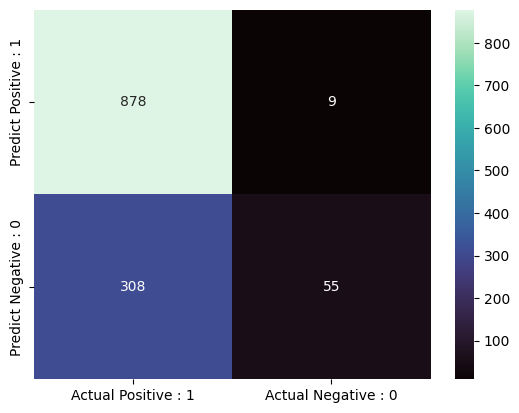

In [53]:
from sklearn.metrics import confusion_matrix

def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    cm_matrix = pd.DataFrame(data = cm, columns = ["Actual Positive : 1", "Actual Negative : 0"],
                             index = ["Predict Positive : 1", "Predict Negative : 0"])
    sns.heatmap(cm_matrix, annot = True, fmt = "d", cmap = "mako")
plot_cm(y_test, y_pred)

In [47]:
y_pred_scores

array([[0.73777715, 0.26222285],
       [0.7379439 , 0.2620561 ],
       [0.73316436, 0.26683564],
       ...,
       [0.73694819, 0.26305181],
       [0.73804305, 0.26195695],
       [0.73553495, 0.26446505]])

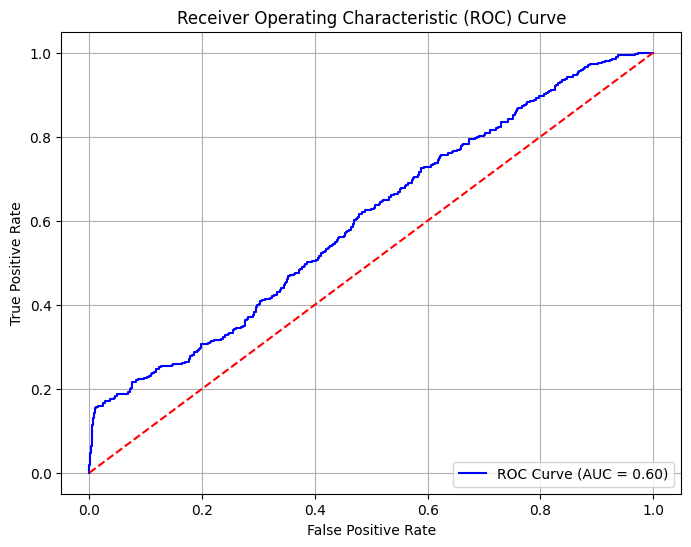

In [52]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_scores = svc.predict_proba(X_test)

def plot_roc(y_test, y_pred_scores):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_scores[:, 1])
    
    auc_score = roc_auc_score(y_test, y_pred_scores[:, 1])
    # Plotting the ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (random performance)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
plot_roc(y_test, y_pred_scores)

### Now we will use different kind of kernels to perform the classification.

Model acc : 0.7384


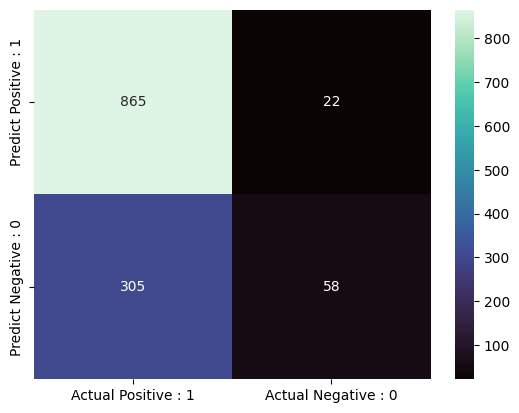

In [56]:
linear_class = SVC(kernel = 'linear', probability = True).fit(X_train, y_train)
y_pred1 = linear_class.predict(X_test)
y_pred_proba1 = linear_class.predict_proba(X_test)
print(f"Model acc : {accuracy_score(y_test, y_pred1)}")
plot_cm(y_test, y_pred1)

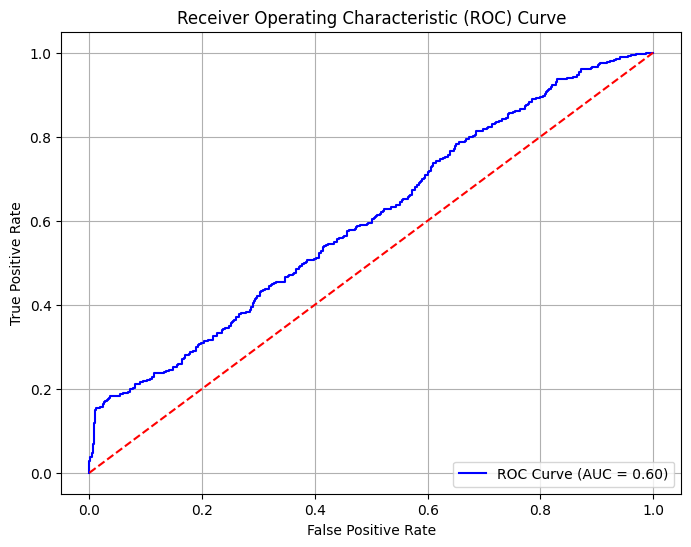

In [57]:
plot_roc(y_test, y_pred_proba1)

Model acc : 0.7464


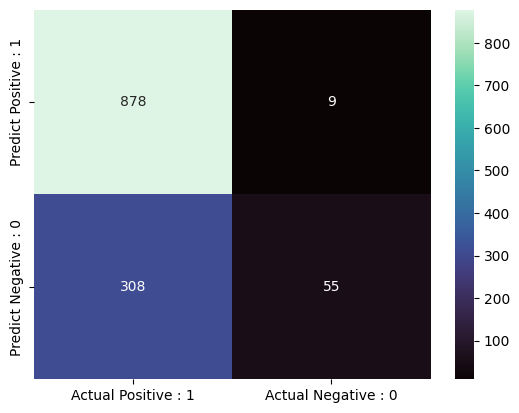

In [58]:
rbf_class = SVC(kernel = 'rbf', probability = True).fit(X_train, y_train)
y_pred2 = rbf_class.predict(X_test)
y_pred_proba2 = rbf_class.predict_proba(X_test)
print(f"Model acc : {accuracy_score(y_test, y_pred2)}")
plot_cm(y_test, y_pred2)

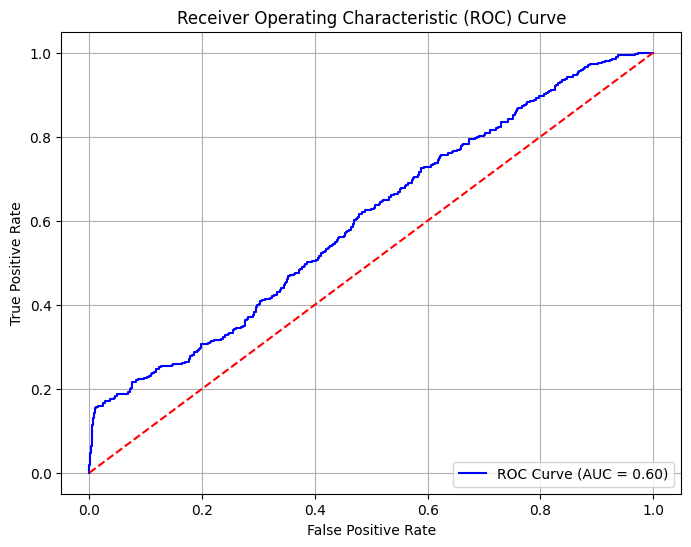

In [59]:
plot_roc(y_test, y_pred_proba2)

Model acc : 0.7472


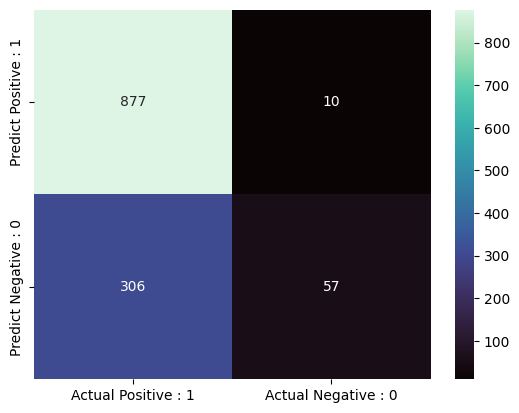

In [60]:
poly_class = SVC(kernel = 'poly', probability = True).fit(X_train, y_train)
y_pred3 = poly_class.predict(X_test)
y_pred_proba3 = poly_class.predict_proba(X_test)
print(f"Model acc : {accuracy_score(y_test, y_pred3)}")
plot_cm(y_test, y_pred3)

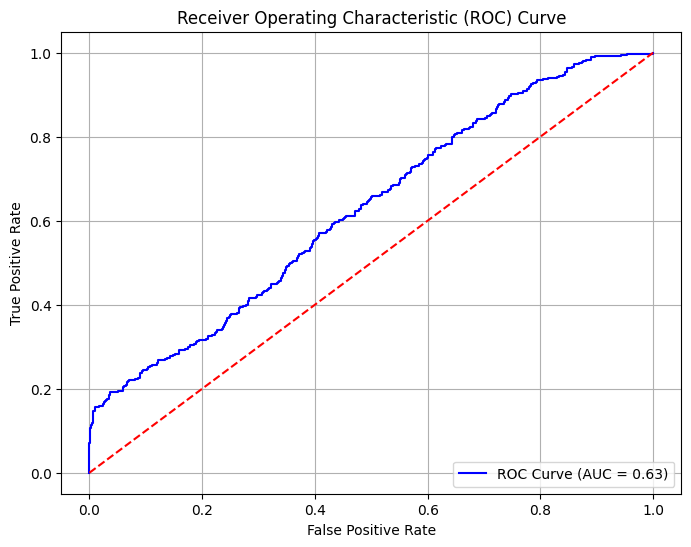

In [61]:
plot_roc(y_test, y_pred_proba3)

Model acc : 0.6312


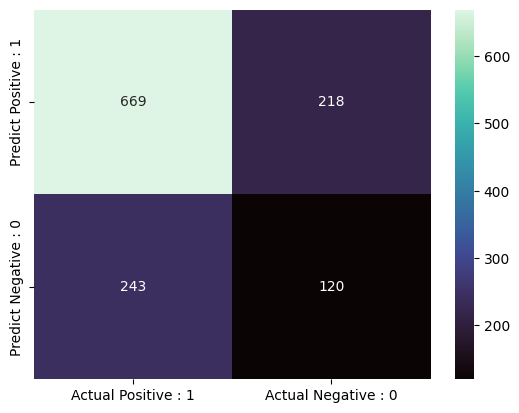

In [62]:
sigmoid_class = SVC(kernel = 'sigmoid', probability = True).fit(X_train, y_train)
y_pred4 = sigmoid_class.predict(X_test)
y_pred_proba4 = sigmoid_class.predict_proba(X_test)
print(f"Model acc : {accuracy_score(y_test, y_pred4)}")
plot_cm(y_test, y_pred4)

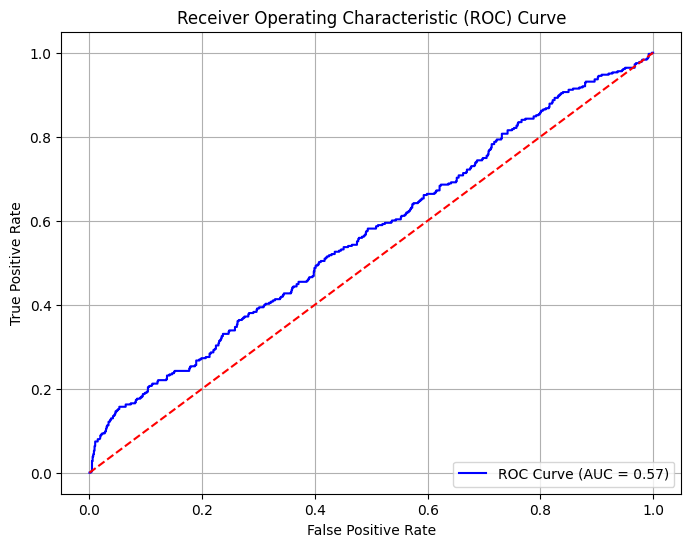

In [63]:
plot_roc(y_test, y_pred_proba4)